### Decision Tree Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv('Airline_Delay_Cause.csv')

In [3]:
df.shape

(171666, 21)

In [4]:
top_6_airlines = ['DL', 'AA', 'UA', 'WN', 'AS', 'B6']
holiday_months = [12, 7, 8]
X = ['year', 'month', 'arr_flights', 'arr_del15', 'carrier', 'airport']
y = ['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']

In [5]:
 print(df['carrier'].unique())

['9E' 'AA' 'AS' 'B6' 'DL' 'F9' 'G4' 'HA' 'MQ' 'NK' 'OH' 'OO' 'UA' 'WN'
 'YX' 'QX' 'YV' 'EV' 'VX' 'US' 'FL']


Fitting 5 folds for each of 84 candidates, totalling 420 fits


/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}

Training Accuracy: 0.6976205973819339

Test Accuracy: 0.6546138270176454

Classification Report:
                   precision    recall  f1-score   support

      carrier_ct       0.69      0.74      0.71      1654
late_aircraft_ct       0.64      0.67      0.66      1171
          nas_ct       0.55      0.42      0.47       616
      weather_ct       1.00      0.00      0.00        16

        accuracy                           0.65      3457
       macro avg       0.72      0.46      0.46      3457
    weighted avg       0.65      0.65      0.65      3457



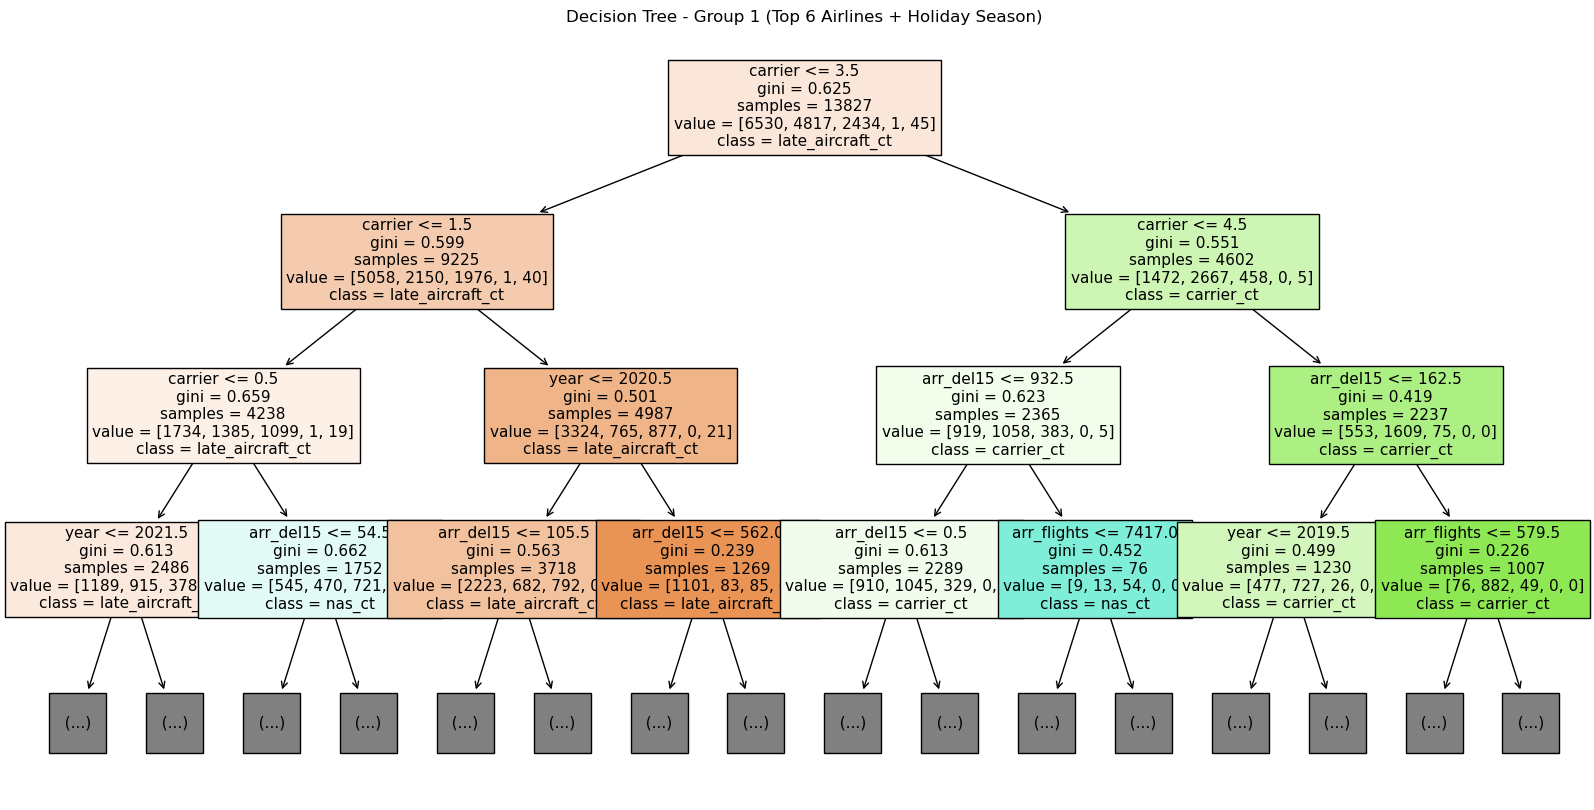

In [6]:
# Group 1 (Top 6 Airlines + Holiday Season)
top_6_airlines = ['DL', 'AA', 'UA', 'WN', 'AS', 'B6']
holiday_months = [12, 7, 8]

df1 = df[df['carrier'].isin(top_6_airlines) & df['month'].isin(holiday_months)].copy()
delay_cols = ['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']
df1[delay_cols] = df1[delay_cols].fillna(0)
df1['delay_reason'] = df1[delay_cols].idxmax(axis=1)

X = df1[['year', 'month', 'arr_flights', 'arr_del15', 'carrier', 'airport']] 
y = df1['delay_reason']  

categorical_cols = ['carrier', 'airport']
label_encoders = {col: LabelEncoder() for col in categorical_cols}

for col in categorical_cols:
    X.loc[:, col] = label_encoders[col].fit_transform(X[col])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

param_grid = {
    'max_depth': [2, 5, 7, 10, 12, 15, 20],
    'min_samples_split': [2, 3, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=11),
    param_grid=param_grid,
    cv=5, 
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print("\nBest Hyperparameters:", best_params)

y_train_pred = best_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("\nTraining Accuracy:", train_accuracy)

y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("\nTest Accuracy:", test_accuracy)

print("\nClassification Report:\n", classification_report(y_test, y_test_pred, zero_division=1))

plt.figure(figsize=(20, 10))
plot_tree(
    best_model,
    feature_names=X.columns,
    class_names=df1['delay_reason'].unique(),
    filled=True, 
    fontsize=11, 
    max_depth=3
)
plt.title("Decision Tree - Group 1 (Top 6 Airlines + Holiday Season)")
plt.show()

Fitting 5 folds for each of 84 candidates, totalling 420 fits

Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2}

Training Accuracy: 0.4968301741803279

Test Accuracy: 0.4980470000640328

Classification Report:
                   precision    recall  f1-score   support

      carrier_ct       0.56      0.76      0.64      6956
late_aircraft_ct       0.43      0.33      0.37      4604
          nas_ct       0.38      0.26      0.31      3871
     security_ct       1.00      0.00      0.00         5
      weather_ct       1.00      0.00      0.00       181

        accuracy                           0.50     15617
       macro avg       0.67      0.27      0.26     15617
    weighted avg       0.48      0.50      0.47     15617



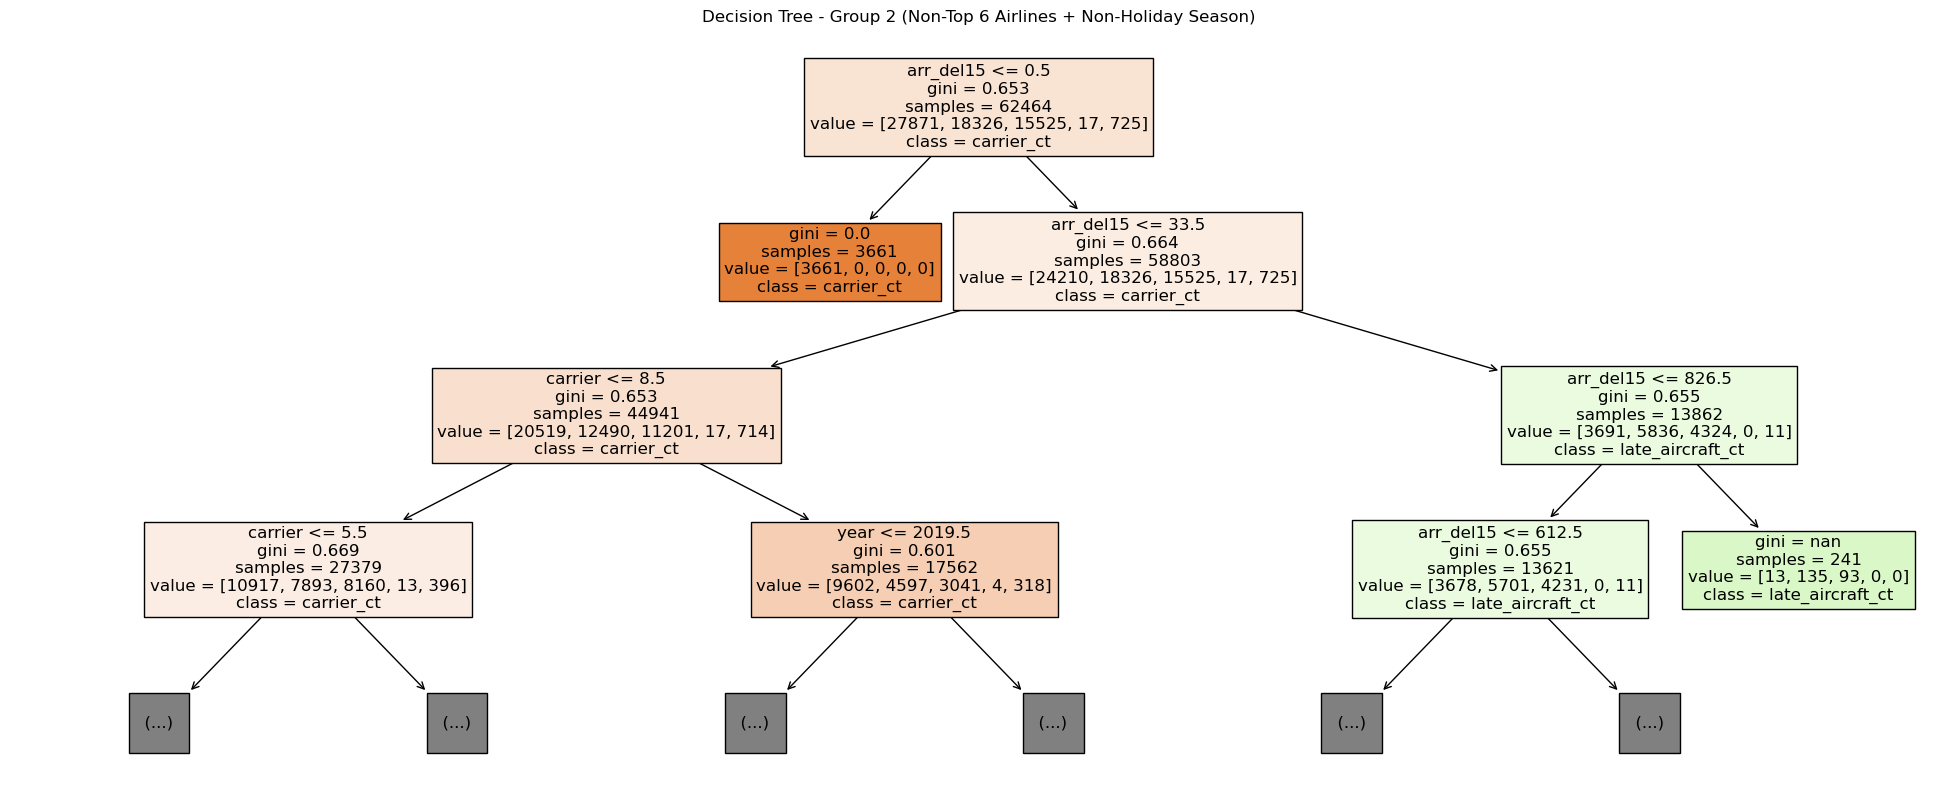

In [7]:
# Group 2 (Non-Top Airlines + Non-Holiday Season)
top_6_airlines = ['DL', 'AA', 'UA', 'WN', 'AS', 'B6']
non_top_airlines = ['9E', 'F9', 'G4', 'HA', 'MQ', 'NK', 'OH', 'OO', 'QX', 'YV', 'EV', 'VX', 'US', 'FL', 'YX']
non_holiday_months = [1, 2, 3, 4, 5, 6, 9, 10, 11]

df_group2 = df[df['carrier'].isin(non_top_airlines) & df['month'].isin(non_holiday_months)].copy()
delay_cols = ['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']
df_group2[delay_cols] = df_group2[delay_cols].fillna(0)
df_group2['delay_reason'] = df_group2[delay_cols].idxmax(axis=1)

X = df_group2[['year', 'month', 'arr_flights', 'arr_del15', 'carrier', 'airport']]  # Features
y = df_group2['delay_reason']  # Target

categorical_cols = ['carrier', 'airport']
label_encoders = {col: LabelEncoder() for col in categorical_cols}

for col in categorical_cols:
    X.loc[:, col] = label_encoders[col].fit_transform(X[col])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'max_depth': [2, 5, 7, 10, 12, 15, 20],
    'min_samples_split': [2, 3, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=11),
    param_grid=param_grid,
    cv=5,  
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print("\nBest Hyperparameters:", best_params)

y_train_pred = best_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("\nTraining Accuracy:", train_accuracy)

y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("\nTest Accuracy:", test_accuracy)

print("\nClassification Report:\n", classification_report(y_test, y_test_pred, zero_division=1))

plt.figure(figsize=(25, 10))
plot_tree(
    best_model,
    feature_names=X.columns,
    class_names=df_group2['delay_reason'].unique(),
    filled=True,
    fontsize=12, 
    max_depth=3 
)
plt.title("Decision Tree - Group 2 (Non-Top 6 Airlines + Non-Holiday Season)")
plt.show()

Fitting 5 folds for each of 84 candidates, totalling 420 fits

Best Hyperparameters: {'max_depth': 12, 'min_samples_leaf': 2, 'min_samples_split': 5}

Training Accuracy: 0.635769609203522

Test Accuracy: 0.6320887991927346

Classification Report:
                   precision    recall  f1-score   support

      carrier_ct       0.65      0.81      0.72      4921
late_aircraft_ct       0.62      0.54      0.58      2814
          nas_ct       0.58      0.36      0.45      2125
     security_ct       1.00      0.00      0.00         2
      weather_ct       1.00      0.00      0.00        48

        accuracy                           0.63      9910
       macro avg       0.77      0.34      0.35      9910
    weighted avg       0.63      0.63      0.62      9910



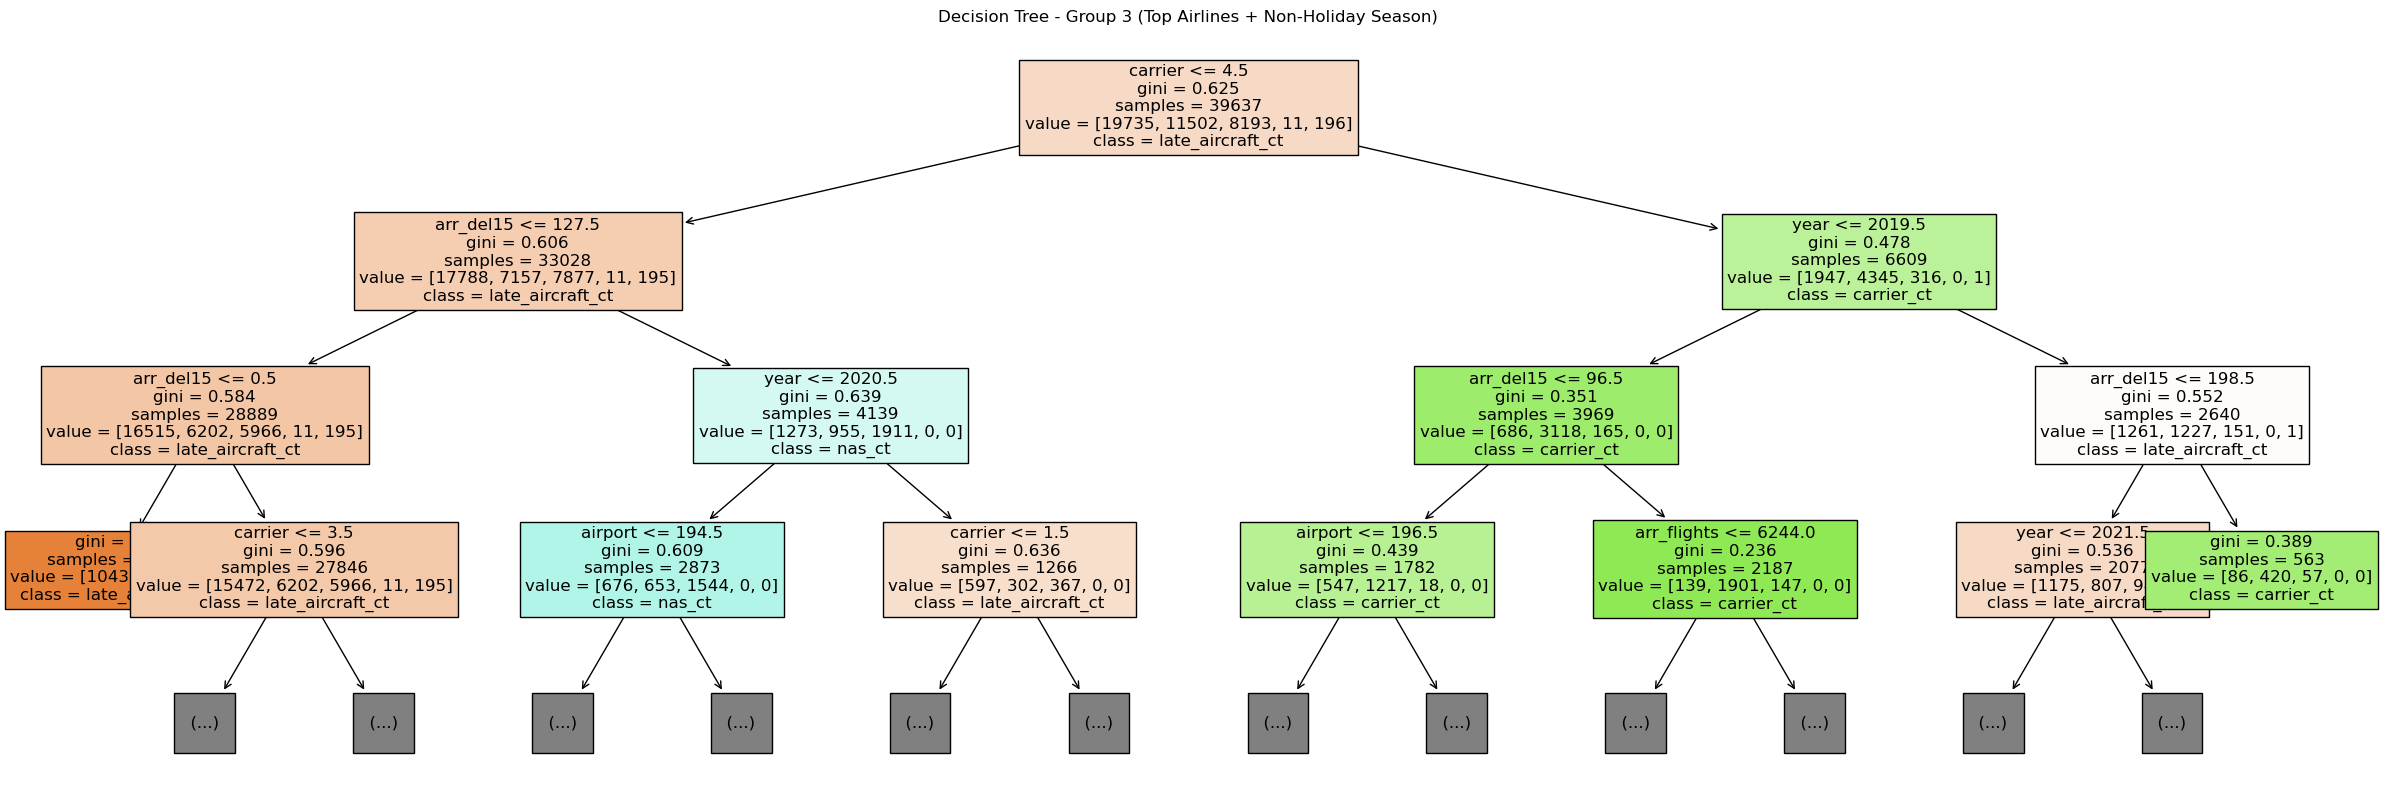

In [8]:
# Group 3 (Top 6 Airlines and Non-Holiday Season)
top_6_airlines = ['DL', 'AA', 'UA', 'WN', 'AS', 'B6']
non_holiday_months = [1, 2, 3, 4, 5, 6, 9, 10, 11]

df_group3 = df[df['carrier'].isin(top_6_airlines) & df['month'].isin(non_holiday_months)].copy()
delay_cols = ['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']
df_group3[delay_cols] = df_group3[delay_cols].fillna(0)

df_group3['delay_reason'] = df_group3[delay_cols].idxmax(axis=1)
X = df_group3[['year', 'month', 'arr_flights', 'arr_del15', 'carrier', 'airport']] 
y = df_group3['delay_reason']

categorical_cols = ['carrier', 'airport']
label_encoders = {col: LabelEncoder() for col in categorical_cols}
for col in categorical_cols:
    X.loc[:, col] = label_encoders[col].fit_transform(X[col])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

param_grid = {
    'max_depth': [2, 5, 7, 10, 12, 15, 20],
    'min_samples_split': [2, 3, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=11),
    param_grid=param_grid,
    cv=5, 
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print("\nBest Hyperparameters:", best_params)

y_train_pred = best_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("\nTraining Accuracy:", train_accuracy)

y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("\nTest Accuracy:", test_accuracy)
 
print("\nClassification Report:\n", classification_report(y_test, y_test_pred, zero_division=1))

plt.figure(figsize=(30, 10))
plot_tree(
    best_model,
    feature_names=X.columns,
    class_names=df_group3['delay_reason'].unique(),
    filled=True,
    fontsize=12, 
    max_depth=3  
)
plt.title("Decision Tree - Group 3 (Top Airlines + Non-Holiday Season)")
plt.show()


Fitting 5 folds for each of 36 candidates, totalling 180 fits

Best Hyperparameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}

Training Accuracy: 0.5460916693921413

Test Accuracy: 0.5277518220893291

Classification Report:
                   precision    recall  f1-score   support

      carrier_ct       0.57      0.67      0.62      2202
late_aircraft_ct       0.48      0.59      0.53      1823
          nas_ct       0.52      0.21      0.30      1245
      weather_ct       1.00      0.00      0.00        81

        accuracy                           0.53      5351
       macro avg       0.64      0.37      0.36      5351
    weighted avg       0.54      0.53      0.50      5351



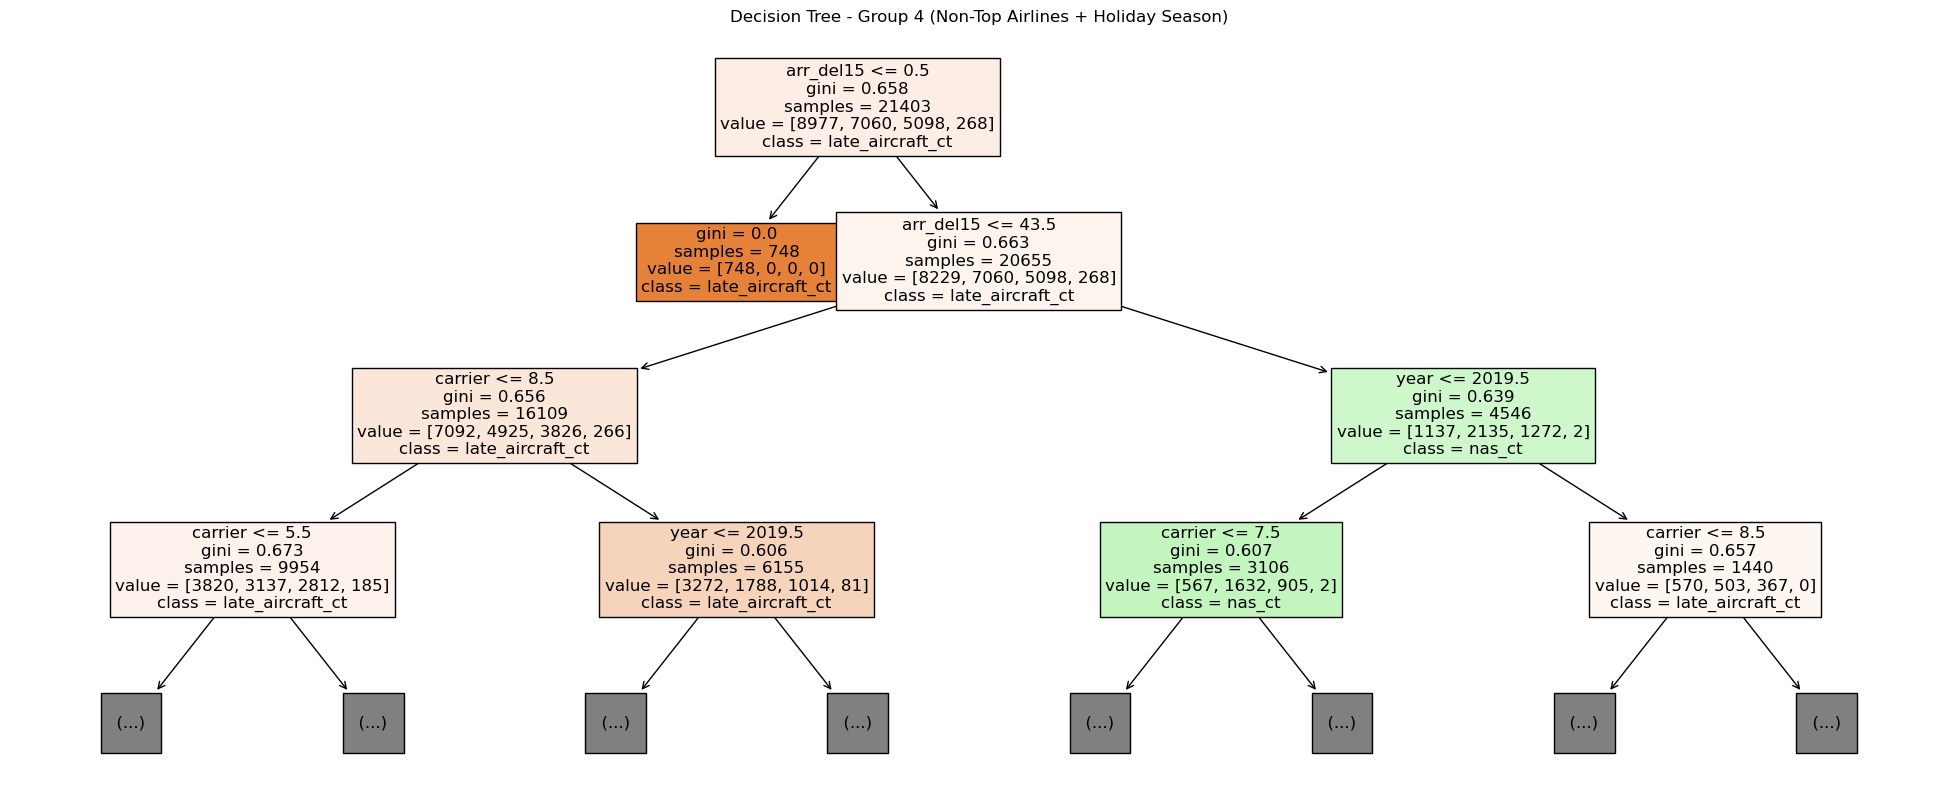

In [107]:
# Group 4 - (Non-Top Airlines + Holiday Season)
non_top_airlines = ['9E', 'F9', 'G4', 'HA', 'MQ', 'NK', 'OH', 'OO', 'QX', 'YV', 'EV', 'VX', 'US', 'FL', 'YX']
holiday_months = [12, 7, 8]

df_group4 = df[df['carrier'].isin(non_top_airlines) & df['month'].isin(holiday_months)].copy()
delay_cols = ['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']
df_group4[delay_cols] = df_group4[delay_cols].fillna(0)
df_group4['delay_reason'] = df_group4[delay_cols].idxmax(axis=1)

X = df_group4[['year', 'month', 'arr_flights', 'arr_del15', 'carrier', 'airport']] 
y = df_group4['delay_reason']  

categorical_cols = ['carrier', 'airport']
label_encoders = {col: LabelEncoder() for col in categorical_cols}
for col in categorical_cols:
    X.loc[:, col] = label_encoders[col].fit_transform(X[col])

 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

param_grid = {
    'max_depth': [2, 5, 7, 10, 12, 15, 20],
    'min_samples_split': [2, 3, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=11),
    param_grid=param_grid,
    cv=5, 
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print("\nBest Hyperparameters:", best_params)

y_train_pred = best_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("\nTraining Accuracy:", train_accuracy)

y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("\nTest Accuracy:", test_accuracy)

print("\nClassification Report:\n", classification_report(y_test, y_test_pred, zero_division=1))

plt.figure(figsize=(25, 10))
plot_tree(
    best_model,
    feature_names=X.columns,
    class_names=df_group4['delay_reason'].unique(),
    filled=True,
    fontsize=12, 
    max_depth=3  
)
plt.title("Decision Tree - Group 4 (Non-Top Airlines + Holiday Season)")
plt.show()
